In [2]:
with open('../quint/data/sample_texts/joe_rogan_tr.txt') as f:
    doc = f.readlines()
doc = doc[0].replace("?", ". ")
sentences = doc.split('. ')

In [3]:
# from nltk.corpus import stopwords 
# import string
# from nltk.stem.wordnet import WordNetLemmatizer
# from nltk import word_tokenize 

# def clean (text):
#     for punctuation in string.punctuation:
#         text = text.replace(punctuation, ' ') # Remove Punctuation
#     lowercased = text.lower() # Lower Case
#     tokenized = word_tokenize(lowercased) # Tokenize
#     words_only = [word for word in tokenized if word.isalpha()] # Remove numbers
#     stop_words = set(stopwords.words('english')) # Make stopword list
#     without_stopwords = [word for word in words_only if not word in stop_words] # Remove Stop Words
#     lemma=WordNetLemmatizer() # Initiate Lemmatizer
#     lemmatized = [lemma.lemmatize(word) for word in without_stopwords] # Lemmatize
#     return lemmatized


In [4]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

#Our sentences we like to encode
# sentences = ['This framework generates embeddings for each input sentence',
#     'Sentences are passed as a list of string.',
#     'The quick brown fox jumps over the lazy dog.']

#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

#Print the embeddings
# for sentence, embedding in zip(sentences, embeddings):
#     print("Sentence:", sentence)
#     print("Embedding:", embedding.shape)
#     print("")

/home/poloniki/.pyenv/versions/3.8.12/envs/quint/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
embeddings.shape

(1887, 384)

In [6]:
import numpy as np
np.array([embeddings[0]]).shape

(1, 384)

In [7]:
from sklearn.metrics.pairwise import cosine_similarity
#cosine_similarity(one, two)

In [8]:
from scipy import sparse

A =  embeddings
A_sparse = sparse.csr_matrix(A)

similarities = cosine_similarity(A_sparse)
print('pairwise dense output:\n {}\n'.format(similarities))

#also can output sparse matrices
similarities_sparse = cosine_similarity(A_sparse,dense_output=False)
print('pairwise sparse output:\n {}\n'.format(similarities_sparse))

pairwise dense output:
 [[1.0000002  0.3092109  0.15213983 ... 0.28460217 0.39334655 0.2910571 ]
 [0.3092109  0.99999994 0.12392418 ... 0.20054002 0.2224401  0.19109748]
 [0.15213983 0.12392418 0.9999998  ... 0.3101638  0.16739963 0.27749968]
 ...
 [0.28460217 0.20054002 0.3101638  ... 1.0000004  0.3816081  0.8888154 ]
 [0.39334655 0.2224401  0.16739963 ... 0.3816081  1.0000006  0.4086203 ]
 [0.2910571  0.19109748 0.27749968 ... 0.8888154  0.4086203  1.0000006 ]]

pairwise sparse output:
   (0, 1886)	0.2910571
  (0, 1885)	0.39334655
  (0, 1884)	0.28460217
  (0, 1883)	0.3337025
  (0, 1882)	0.24203594
  (0, 1881)	0.4203028
  (0, 1880)	0.2211705
  (0, 1879)	0.18847454
  (0, 1878)	0.2211705
  (0, 1877)	0.16108513
  (0, 1876)	0.117509104
  (0, 1875)	0.3530556
  (0, 1874)	0.18309243
  (0, 1873)	0.11683156
  (0, 1872)	0.15395218
  (0, 1871)	0.08756776
  (0, 1870)	0.037621196
  (0, 1869)	0.20961772
  (0, 1868)	0.564041
  (0, 1867)	0.21286657
  (0, 1866)	0.31315294
  (0, 1865)	0.1855116
  (0, 1

In [9]:
story = []

for each in range(embeddings.shape[0]):
    try:
        A =  embeddings[each:each+10]
        A_sparse = sparse.csr_matrix(A)
        similarities = cosine_similarity(A_sparse)
        story.append(similarities[1:,0].max())

    except:
        print('We reached an end')

We reached an end


In [10]:
A =  embeddings[0:0+4]
A_sparse = sparse.csr_matrix(A)
similarities = cosine_similarity(A_sparse)


In [11]:
similarities[1:,0]

array([0.3092109 , 0.15213983, 0.21776927], dtype=float32)

In [12]:
sparse = cosine_similarity(A_sparse,dense_output=False)
print('pairwise sparse output:\n {}\n'.format(sparse))

pairwise sparse output:
   (0, 3)	0.21776927
  (0, 2)	0.15213983
  (0, 1)	0.3092109
  (0, 0)	1.0000002
  (1, 3)	0.10510075
  (1, 2)	0.12392418
  (1, 1)	0.99999994
  (1, 0)	0.3092109
  (2, 3)	0.24856639
  (2, 2)	0.9999998
  (2, 1)	0.12392418
  (2, 0)	0.15213983
  (3, 3)	1.0000002
  (3, 2)	0.24856639
  (3, 1)	0.10510075
  (3, 0)	0.21776927



In [13]:
import pandas as pd

df = pd.DataFrame()
df['story'] = story
df['sentence'] = sentences[:-1]
df['len'] = df['sentence'].apply(lambda x: len(x))
df['cum'] = df['len'].cumsum()

In [14]:
df

,story,sentence,len,cum
0,0.309211,Okay,4,4
1,0.301535,You're very professional,24,28
2,0.248566,"People are like, how do you live",32,60
3,0.188258,And things like that,21,81
4,0.106628,They're taking money from the russians,38,119
...,...,...,...,...
1881,0.596939,Open,4,151133
1882,0.414088,Stay free,9,151142
1883,0.289221,Open the possibility,20,151162
1884,0.888815,Take care,9,151171


<AxesSubplot:xlabel='cum', ylabel='story'>

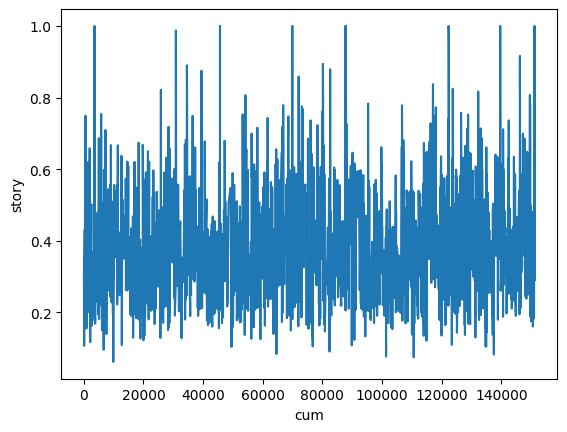

In [15]:
import seaborn as sns

sns.lineplot(data=df, y='story', x='cum')

<AxesSubplot:xlabel='cum', ylabel='smooth'>

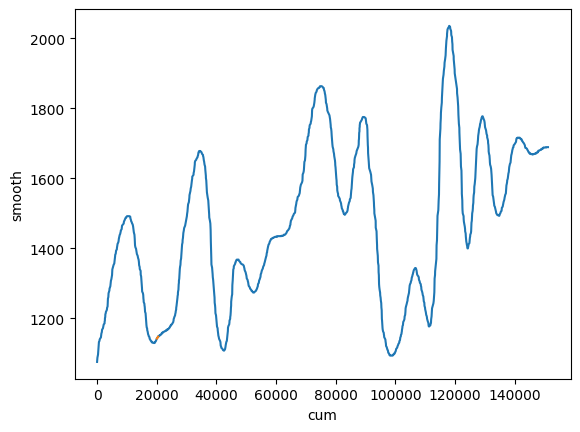

In [16]:
import numpy as np
from scipy.signal import butter,filtfilt
import seaborn as sns

# Filter requirements.
T = 50.0         # Sample Period
fs = 20.0       # sample rate, Hz
cutoff = 3      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
nyq = 10 * fs  # Nyquist Frequency
order = 6 # 6 # 10     # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples

def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

array = butter_lowpass_filter(story,cutoff, fs, order)
df['smooth'] = array
df['smooth'] = df['smooth'].apply(lambda x: round(round(x*100,2)**2,0))
#df['cum_sq'] = df['cum'].apply(lambda x: round(x**1/30))
sns.lineplot(data=df, y='smooth', x='cum')
sns.lineplot(data=df.loc[(df.cum>20000)&(df.cum<20500)], y='smooth', x='cum')

<AxesSubplot:xlabel='cum'>

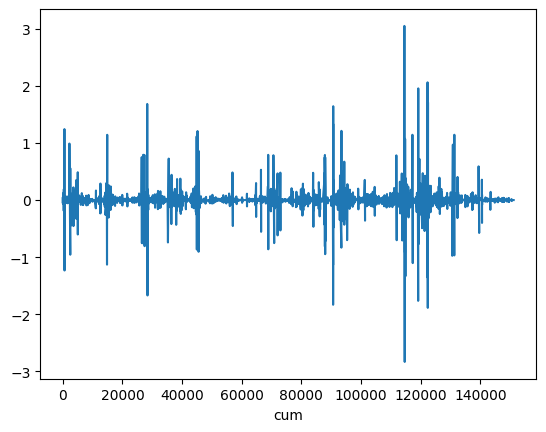

In [17]:
m =  np.diff(df['smooth'])/np.diff(df['cum'])
sns.lineplot(y=np.diff(m), x=df['cum'][:-2])

In [18]:
#20059
df.sort_values('smooth')
test = df.groupby(['smooth', 'cum']).min().reset_index()

test.loc[test.smooth == 0]

,smooth,cum,story,sentence,len


In [19]:
#df.sort_values('smooth').loc[df.bayes==34.938789]

In [20]:
import matplotlib.pyplot as plt

In [21]:
# import bayesian_changepoint_detection.offline_changepoint_detection as offcd
# from functools import partial
# data = df['smooth']
# Q, P, Pcp = offcd.offline_changepoint_detection(data, partial(offcd.const_prior, l=(len(data)+1)), offcd.gaussian_obs_log_likelihood, truncate=-1)
# fig, ax = plt.subplots(figsize=[18, 16])
# ax = fig.add_subplot(2, 1, 1)
# ax.plot(data[:])
# ax = fig.add_subplot(2, 1, 2, sharex=ax)
# ax.plot(np.exp(Pcp).sum(0))

In [22]:
import numpy as np
import tensorflow.compat.v2 as tf
tf.enable_v2_behavior()
import tensorflow_probability as tfp
from tensorflow_probability import distributions as tfd

from matplotlib import pylab as plt
%matplotlib inline
import scipy.stats



2022-09-01 11:51:33.188183: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-09-01 11:51:33.214462: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-01 11:51:33.214478: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [23]:
max_num_states = 12

def build_latent_state(num_states, max_num_states, daily_change_prob=0.05):

  # Give probability exp(-100) ~= 0 to states outside of the current model.
  active_states_mask = tf.concat([tf.ones([num_states]),
                                  tf.zeros([max_num_states - num_states])],
                                 axis=0)
  initial_state_logits = -100. * (1 - active_states_mask)

  # Build a transition matrix that transitions only within the current
  # `num_states` states.
  transition_probs = tf.fill([num_states, num_states],
                             0. if num_states == 1
                             else daily_change_prob / (num_states - 1))  
  padded_transition_probs = tf.eye(max_num_states) + tf.pad(
      tf.linalg.set_diag(transition_probs,
                         tf.fill([num_states], - daily_change_prob)),
      paddings=[(0, max_num_states - num_states),
                (0, max_num_states - num_states)])

  return initial_state_logits, padded_transition_probs

# For each candidate model, build the initial state prior and transition matrix.
batch_initial_state_logits = []
batch_transition_probs = []
for num_states in range(1, max_num_states+1):
  initial_state_logits, transition_probs = build_latent_state(
      num_states=num_states,
      max_num_states=max_num_states)
  batch_initial_state_logits.append(initial_state_logits)
  batch_transition_probs.append(transition_probs)

batch_initial_state_logits = tf.stack(batch_initial_state_logits)
batch_transition_probs = tf.stack(batch_transition_probs)
print("Shape of initial_state_logits: {}".format(batch_initial_state_logits.shape))
print("Shape of transition probs: {}".format(batch_transition_probs.shape))
print("Example initial state logits for num_states==3:\n{}".format(batch_initial_state_logits[2, :]))
print("Example transition_probs for num_states==3:\n{}".format(batch_transition_probs[2, :, :]))

Shape of initial_state_logits: (12, 12)
Shape of transition probs: (12, 12, 12)
Example initial state logits for num_states==3:
[  -0.   -0.   -0. -100. -100. -100. -100. -100. -100. -100. -100. -100.]
Example transition_probs for num_states==3:
[[0.95  0.025 0.025 0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.025 0.95  0.025 0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.025 0.025 0.95  0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    1.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    1.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    1.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    1.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    1.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    1.    0.    0.   ]
 [0.

2022-09-01 11:51:36.588060: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-01 11:51:36.588098: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-01 11:51:36.588116: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-533EO63): /proc/driver/nvidia/version does not exist
2022-09-01 11:51:36.589633: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
observed_counts = df['smooth'].astype('float32')

In [25]:
trainable_log_rates = tf.Variable(
    tf.fill([batch_initial_state_logits.shape[0], max_num_states],
            tf.math.log(tf.reduce_mean(observed_counts))) + 
     tf.random.stateless_normal([1, max_num_states], seed=(42, 42)),
     name='log_rates')

hmm = tfd.HiddenMarkovModel(
  initial_distribution=tfd.Categorical(
      logits=batch_initial_state_logits),
  transition_distribution=tfd.Categorical(probs=batch_transition_probs),
  observation_distribution=tfd.Poisson(log_rate=trainable_log_rates),
  num_steps=len(observed_counts))
print("Defined HMM with batch shape: {}".format(hmm.batch_shape))

Defined HMM with batch shape: (12,)


In [26]:
rate_prior = tfd.LogNormal(1, 1) #5,5

def log_prob():
  prior_lps = rate_prior.log_prob(tf.math.exp(trainable_log_rates))
  prior_lp = tf.stack(
      [tf.reduce_sum(prior_lps[i, :i+1]) for i in range(max_num_states)])
  return prior_lp + hmm.log_prob(observed_counts)

Text(0, 0.5, 'Negative log marginal likelihood')

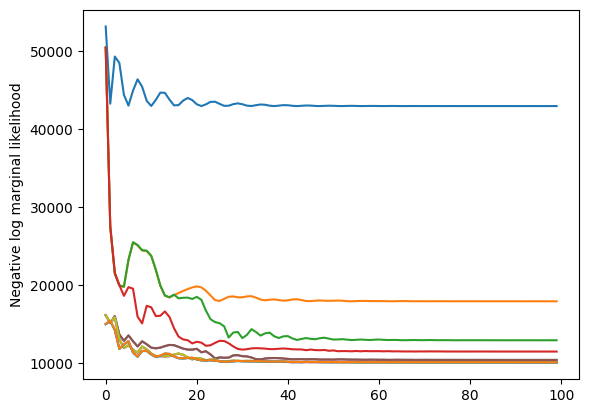

In [27]:
losses = tfp.math.minimize(
    lambda: -log_prob(),
    optimizer=tf.optimizers.Adam(0.1),
    num_steps=100)
plt.plot(losses)
plt.ylabel('Negative log marginal likelihood')

Text(0.5, 1.0, 'Model selection on latent states')

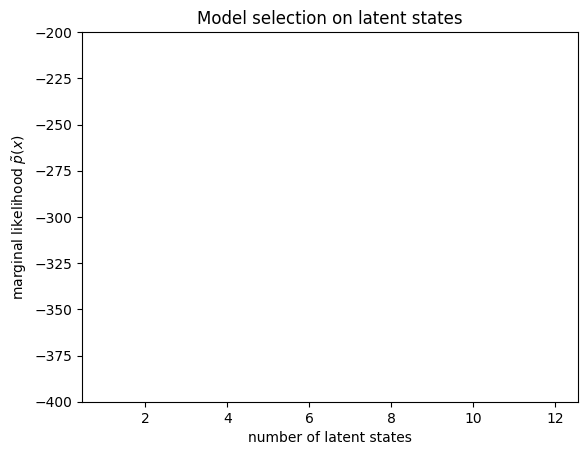

In [28]:
num_states = np.arange(1, max_num_states+1)
plt.plot(num_states, -losses[-1])
plt.ylim([-400, -200])
plt.ylabel("marginal likelihood $\\tilde{p}(x)$")
plt.xlabel("number of latent states")
plt.title("Model selection on latent states")

In [29]:
rates = tf.exp(trainable_log_rates)
for i, learned_model_rates in enumerate(rates):
  print("rates for {}-state model: {}".format(i+1, learned_model_rates[:i+1]))

rates for 1-state model: [1457.3447]
rates for 2-state model: [1265.093  1658.6056]
rates for 3-state model: [1193.687  1439.5023 1726.4171]
rates for 4-state model: [1158.5256 1323.2217 1737.6469 1502.8696]
rates for 5-state model: [1314.1124 1683.3982 1480.1548 1887.9335 1157.9088]
rates for 6-state model: [1.3131635e+03 1.6838695e+03 1.4803644e+03 1.8898331e+03 1.1576819e+03
 1.3406796e+00]
rates for 7-state model: [1.4186528e+03 1.5365509e+03 1.6964031e+03 1.8945339e+03 1.2949808e+03
 1.3406796e+00 1.1536349e+03]
rates for 8-state model: [1.4187847e+03 1.5364718e+03 1.6964241e+03 1.8944869e+03 1.2951056e+03
 1.3406796e+00 1.1536575e+03 1.2285219e+00]
rates for 9-state model: [1.4187625e+03 1.5359971e+03 1.6963190e+03 1.8943008e+03 1.2955670e+03
 1.3406796e+00 1.1538671e+03 1.2285219e+00 1.3390319e+00]
rates for 10-state model: [1.4371211e+03 1.5493888e+03 1.8948826e+03 1.6988315e+03 1.3040464e+03
 1.3406796e+00 1.4494507e+00 1.2285219e+00 1.3390319e+00 1.1552869e+03]
rates for 11-s

In [30]:
most_probable_states = hmm.posterior_mode(observed_counts)


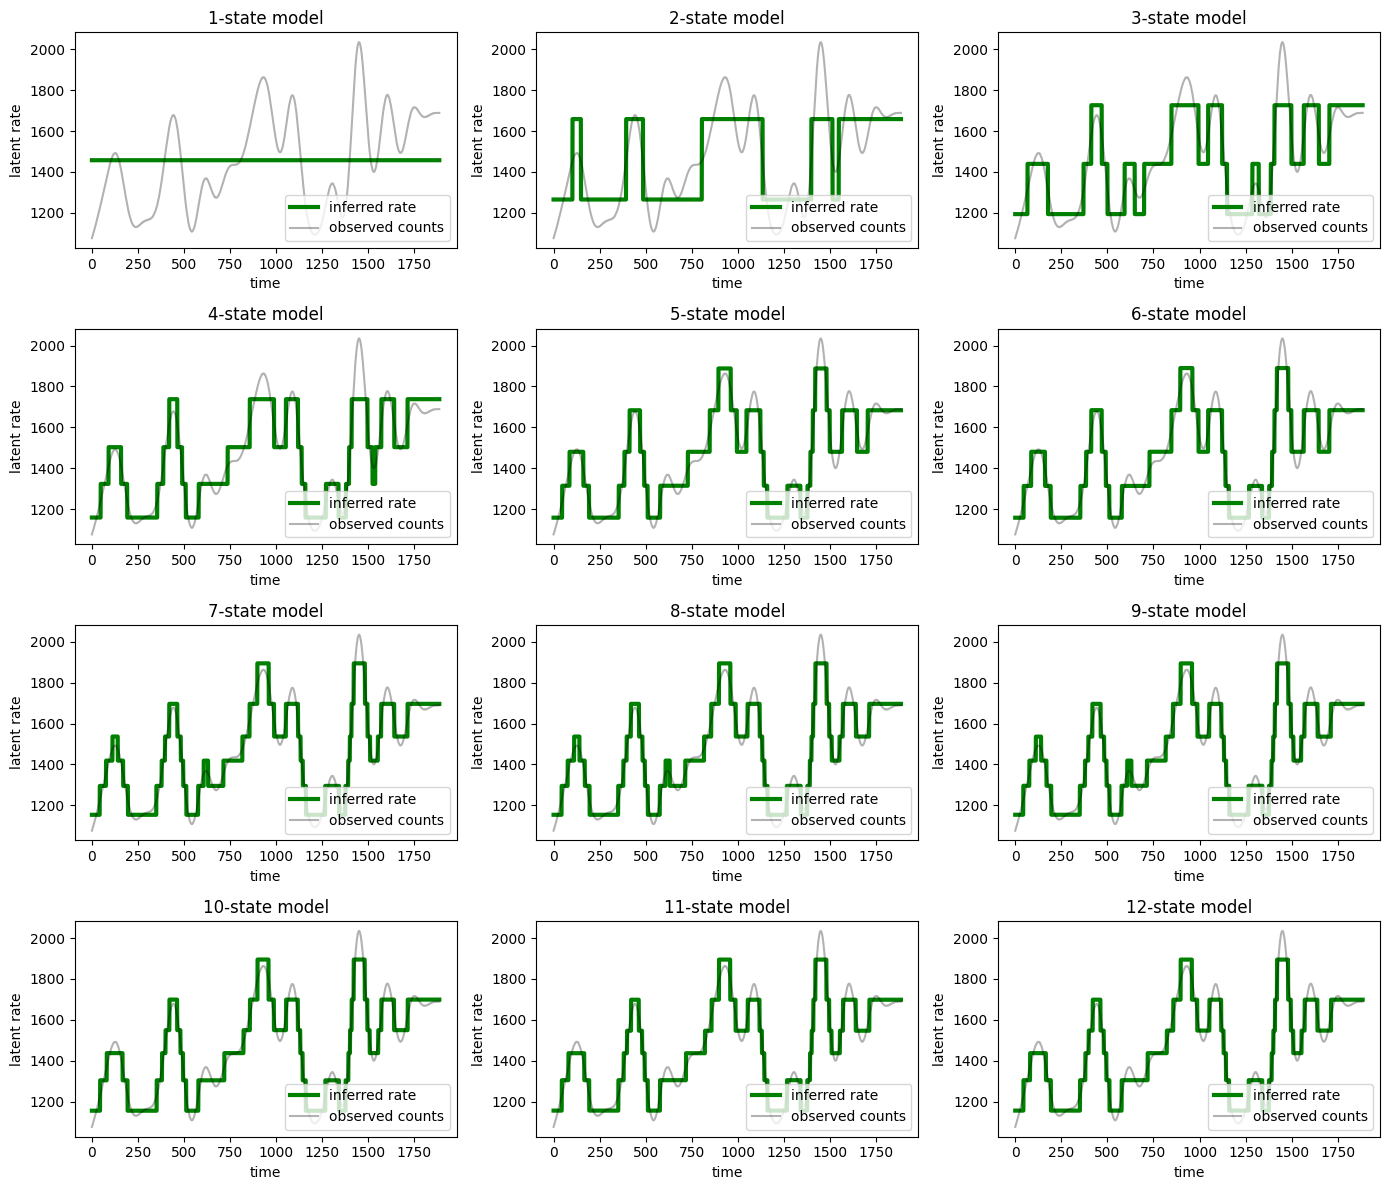

In [31]:
fig = plt.figure(figsize=(14, 12))
for i, learned_model_rates in enumerate(rates):
    
  ax = fig.add_subplot(4, 3, i+1)
  ax.plot(tf.gather(learned_model_rates, most_probable_states[i]), c='green', lw=3, label='inferred rate')
  ax.plot(observed_counts, c='black', alpha=0.3, label='observed counts')
  ax.set_ylabel("latent rate")
  ax.set_xlabel("time")
  ax.set_title("{}-state model".format(i+1))
  ax.legend(loc=4)
plt.tight_layout()

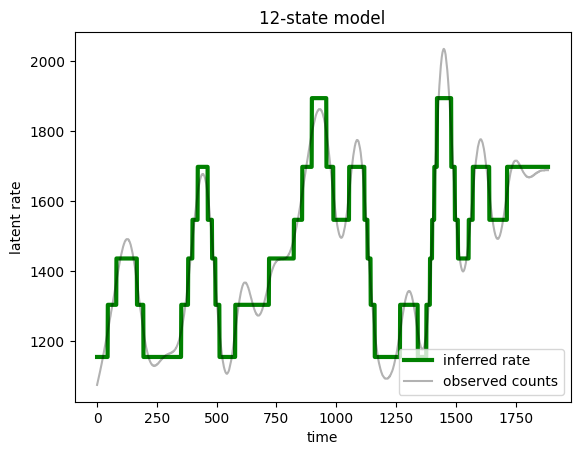

In [32]:
fig,ax = plt.subplots()
number = 11
ax.plot(tf.gather(learned_model_rates, most_probable_states[number]), c='green', lw=3, label='inferred rate')
ax.plot(observed_counts, c='black', alpha=0.3, label='observed counts')
ax.set_ylabel("latent rate")
ax.set_xlabel("time")
ax.set_title("{}-state model".format(number+1))
ax.legend(loc=4)

In [33]:
df['bayes'] = tf.gather(learned_model_rates, most_probable_states[11])
df

,story,sentence,len,cum,smooth,bayes
0,0.309211,Okay,4,4,1076.0,1155.791016
1,0.301535,You're very professional,24,28,1079.0,1155.791016
2,0.248566,"People are like, how do you live",32,60,1082.0,1155.791016
3,0.188258,And things like that,21,81,1085.0,1155.791016
4,0.106628,They're taking money from the russians,38,119,1088.0,1155.791016
...,...,...,...,...,...,...
1881,0.596939,Open,4,151133,1689.0,1698.389282
1882,0.414088,Stay free,9,151142,1689.0,1698.389282
1883,0.289221,Open the possibility,20,151162,1689.0,1698.389282
1884,0.888815,Take care,9,151171,1689.0,1698.389282


In [34]:
df['bayes'].min()

1155.791

In [35]:
# df.reset_index(inplace=True)
# df.head()

<AxesSubplot:>

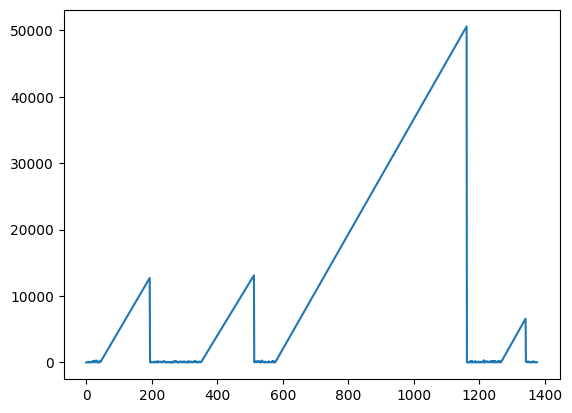

In [115]:
time_diff = df[['cum']][df['bayes'] == df['bayes'].min()]
time_diff['diff_cum'] = time_diff['cum'].diff().fillna(0.0)
time_diff['diff_cum'].plot()

In [56]:
time_diff.shape

(411, 3)

In [37]:
len(time_diff)
time_diff['masked'].iloc[45]

KeyError: 'masked'

In [116]:
def is_outlier(x,mean,std):
    return int(np.abs(x - mean) > std)
    
    
#time_diff.drop(columns = ['index'] , inplace = True)
time_diff['outliers'] = time_diff['diff_cum'].apply(lambda x : is_outlier(x , time_diff['diff_cum'].mean() , time_diff['diff_cum'].std(ddof=0)))
total_categories = time_diff['outliers'].sum()
total_categories

4

In [117]:
time_diff[time_diff['outliers']==1]

,cum,diff_cum,outliers
194,16031,12723.0,1
512,39646,13119.0,1
1161,95423,50577.0,1
1341,110007,6597.0,1


In [118]:
time_diff['diff_cum']

0        0.0
1       24.0
2       32.0
3       21.0
4       38.0
        ... 
1372    73.0
1373    60.0
1374    33.0
1375    47.0
1376    26.0
Name: diff_cum, Length: 411, dtype: float64

[194, 512, 1161, 1341]

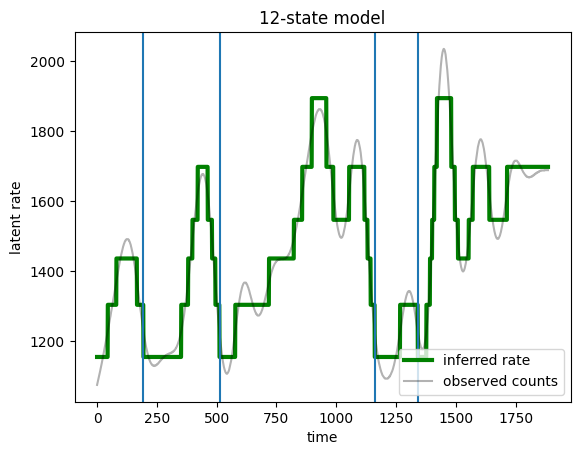

In [119]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
number = 11
ax.plot(tf.gather(learned_model_rates, most_probable_states[number]), c='green', lw=3, label='inferred rate')
ax.plot(observed_counts, c='black', alpha=0.3, label='observed counts')
ax.set_ylabel("latent rate")
ax.set_xlabel("time")
ax.set_title("{}-state model".format(number+1))
ax.legend(loc=4)

outliers_loc = time_diff['cum'][time_diff['outliers']==1].index.tolist()

# for outlier in outliers_loc:
#     outliers_loc.append(outlier - 1)
    
for outlier in outliers_loc:
    ax.axvline(outlier)
    
outliers_loc

In [62]:
time_diff[time_diff['outliers']==1]

,cum,diff_cum,outliers
194,16031,12723.0,1
512,39646,13119.0,1
1161,95423,50577.0,1
1341,110007,6597.0,1


In [64]:
time_diff.loc[194,:]

cum         16031.0
diff_cum    12723.0
outliers        1.0
Name: 194, dtype: float64

In [120]:
new_time_diff = time_diff.reset_index()

In [122]:
new_time_diff.iloc[new_time_diff[new_time_diff['index'] == 194].index - 1]['index'].values[0]

44

In [102]:
time_diff.iloc[time_diff[time_diff['index'] == 194].index - 1]['index'].values[0]

44

In [104]:
outliers_loc

[45, 203, 269, 375]

45


IndexError: index 0 is out of bounds for axis 0 with size 0

In [123]:
new_outliers_loc = [] 
max_iter = 1000

for idx , outlier in enumerate(outliers_loc):
    print(outlier)
    value = new_time_diff.iloc[new_time_diff[new_time_diff['index'] == outlier].index - 1]['index'].values[0]
    print(value)
    new_outliers_loc.append(value) 
    new_outliers_loc.append(outlier)
    if idx > max_iter:
        break

new_outliers_loc

194
44
512
351
1161
577
1341
1266


[44, 194, 351, 512, 577, 1161, 1266, 1341]

In [124]:
new_outliers_loc

[44, 194, 351, 512, 577, 1161, 1266, 1341]

In [130]:
#new_outliers_loc.insert(0,0)
#for _ in range(3):
    #new_outliers_loc.pop(-1)
#new_outliers_loc.append(new_time_diff['index'].iloc[-1])
new_outliers_loc

[0, 44, 194, 351, 512, 577, 1161, 1266, 1341, 1376]

[194, 512, 1161, 1341]

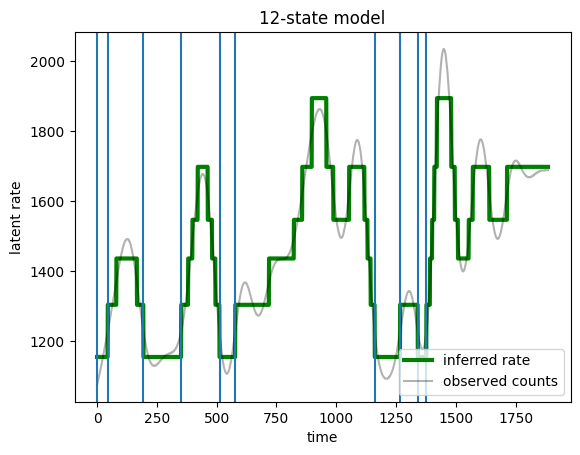

In [131]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
number = 11
ax.plot(tf.gather(learned_model_rates, most_probable_states[number]), c='green', lw=3, label='inferred rate')
ax.plot(observed_counts, c='black', alpha=0.3, label='observed counts')
ax.set_ylabel("latent rate")
ax.set_xlabel("time")
ax.set_title("{}-state model".format(number+1))
ax.legend(loc=4)

outliers_loc = time_diff['cum'][time_diff['outliers']==1].index.tolist()

# for outlier in outliers_loc:
#     outliers_loc.append(outlier - 1)
    
for outlier in new_outliers_loc:
    ax.axvline(outlier)
    
outliers_loc

In [132]:
new_outliers_loc

[0, 44, 194, 351, 512, 577, 1161, 1266, 1341, 1376]

In [149]:
start_points = new_outliers_loc[::2]
middle_points = []
index_means = []

for start_point in start_points:
    end_point = new_outliers_loc[new_outliers_loc.index(start_point) + 1]
    print(f"Range : {start_point} , {end_point}")
    index_means.append( (end_point + start_point)/2)
    middle_points.append( time_diff.reset_index()[['cum','index']].query(f'{end_point} >= index >= {start_point}').median()[0] )
middle_points

Range : 0 , 44
Range : 194 , 351
Range : 512 , 577
Range : 1161 , 1266
Range : 1341 , 1376


[1291.0, 20923.5, 42621.5, 99021.0, 111179.5]

[194, 512, 1161, 1341]

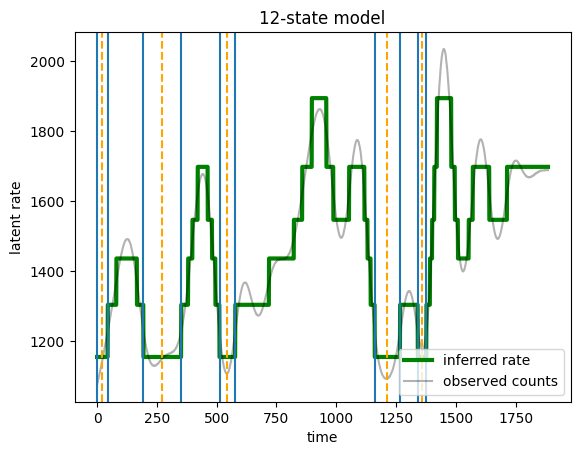

In [151]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
number = 11
ax.plot(tf.gather(learned_model_rates, most_probable_states[number]), c='green', lw=3, label='inferred rate')
ax.plot(observed_counts, c='black', alpha=0.3, label='observed counts')
ax.set_ylabel("latent rate")
ax.set_xlabel("time")
ax.set_title("{}-state model".format(number+1))
ax.legend(loc=4)

outliers_loc = time_diff['cum'][time_diff['outliers']==1].index.tolist()

# for outlier in outliers_loc:
#     outliers_loc.append(outlier - 1)
    
for outlier in new_outliers_loc:
    ax.axvline(outlier)
    
for mean in index_means:
    ax.axvline(mean , color = 'orange' , linestyle = '--')
    
outliers_loc

In [152]:
middle_points

[1291.0, 20923.5, 42621.5, 99021.0, 111179.5]

In [133]:
indexes = new_time_diff['index']
middle_points = []



,index,cum,diff_cum,outliers
0,0,4,0.0,0
1,1,28,24.0,0
2,2,60,32.0,0
3,3,81,21.0,0
4,4,119,38.0,0
...,...,...,...,...
406,1372,112085,73.0,0
407,1373,112145,60.0,0
408,1374,112178,33.0,0
409,1375,112225,47.0,0


44
202
268
374
Reached an end


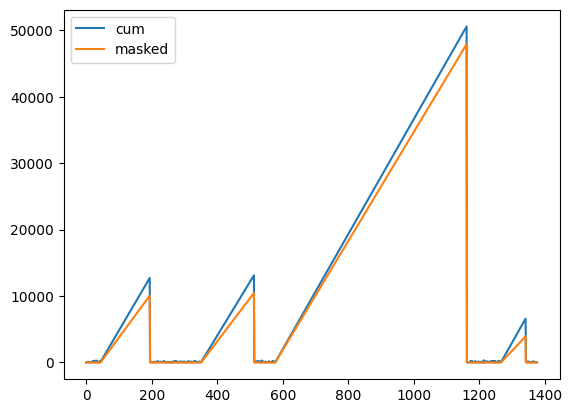

In [ ]:
time_diff['masked'] = time_diff['cum'].apply(lambda x: x - time_diff['cum'].std())
time_diff['masked'] =time_diff['masked'].apply(lambda x: max(0,x))
time_diff.plot()

starts = []
ends = []
for each in range(len(time_diff)):
    try:
        if time_diff['masked'].iloc[each] < time_diff['masked'].iloc[each+1]:
            print(each)
            starts.append(each)
        elif time_diff['masked'].iloc[each] > time_diff['masked'].iloc[each+1]:
            print('end', each)

    except:
        print('Reached an end')
        
        

In [ ]:
time_diff['masked'].iloc[202]

0.0

In [ ]:
ends

[45, 203, 269, 375]

10059.618536022786

In [ ]:
time_diff.head(50)

,cum,masked
0,0.0,0.000000
1,24.0,0.000000
2,32.0,0.000000
3,21.0,0.000000
4,38.0,0.000000
5,72.0,0.000000
6,108.0,0.000000
7,24.0,0.000000
8,26.0,0.000000
9,12.0,0.000000


[57.0, 78.0, 92.0, 26.0, 84.0, 59.0, 30.0]

In [ ]:
std = time_diff.std(ddof = 0)
std

cum    2660.139367
dtype: float64

/home/poloniki/.pyenv/versions/3.8.12/envs/quint/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

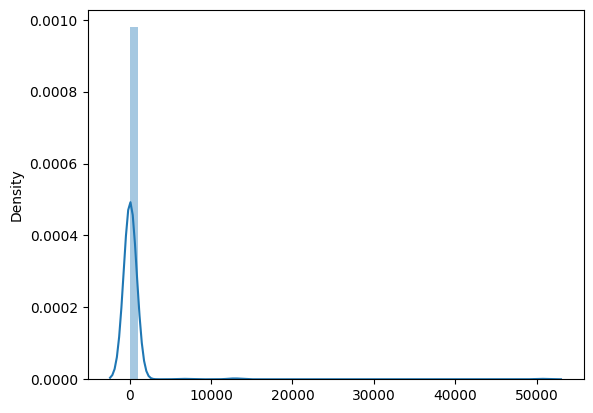

In [ ]:
sns.distplot(time_diff)

In [ ]:
df['pcp'] = np.hstack((np.exp(Pcp).sum(0),1))
df['pcp'] =df['pcp'].apply(lambda x: round(x,0))
df.describe()

,story,len,cum,smooth,bayes,pcp
count,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000
mean,0.381390,80.155885,75893.422057,38.018028,35.730003,0.002651
std,0.154140,64.746124,44562.307772,2.533880,2.008244,0.051434
min,0.061603,3.000000,4.000000,33.550000,34.856045,0.000000
25%,0.265620,34.000000,36753.750000,35.740000,34.856045,0.000000
50%,0.357998,60.000000,76136.000000,38.145000,34.938789,0.000000
75%,0.468815,108.000000,114868.250000,40.460000,34.938789,0.000000
max,1.000000,412.000000,151174.000000,41.760000,40.557739,1.000000


In [154]:
df.head(1)

,story,sentence,len,cum,smooth,bayes
0,0.309211,Okay,4,4,1076.0,1155.791016


In [156]:
middle_points

[1291.0, 20923.5, 42621.5, 99021.0, 111179.5]

In [ ]:
df['new_bay'] = df['bayes'].apply(lambda x: min(df['bayes'].min()))

In [158]:
df.loc[df.cum > 20922]

,story,sentence,len,cum,smooth,bayes
273,0.228065,"As far back as it goes, my family, my whole li...",113,20980,1151.0,1155.791016
274,0.257384,"So it was pretty ordinary, pretty expected for...",82,21062,1153.0,1155.791016
275,0.447415,"Now, I started I wasn't super successful in sc...",202,21264,1153.0,1155.791016
276,0.369434,And so I spent more and more time focusing on ...,159,21423,1154.0,1155.791016
277,0.650027,"I say drop out of high school, but I'm actual...",75,21498,1155.0,1155.791016
...,...,...,...,...,...,...
1881,0.596939,Open,4,151133,1689.0,1698.389282
1882,0.414088,Stay free,9,151142,1689.0,1698.389282
1883,0.289221,Open the possibility,20,151162,1689.0,1698.389282
1884,0.888815,Take care,9,151171,1689.0,1698.389282


In [184]:
myNumber =  3
myList =  [5,10,14]


true_middle_points = [min(df['cum'], key=lambda x:abs(x-each-1000)) for each in middle_points]


In [185]:
true_middle_points

[2232, 21902, 43608, 100017, 112178]

In [186]:
text = ''
for num, each in enumerate(df['sentence']):
    if df['cum'].iloc[num] in true_middle_points:
        text+=f' \n \n  {each}. '
    else:
        text+=f'{each}. '
    
print(text)

Okay. You're very professional. People are like, how do you live.  And things like that. They're taking money from the russians. And of course the answer is no, but I do this for a living, like I speak. I don't have a YouTube channel where I'm joe rogan, but I give speeches at universities and things like that. I do a lot of interviews. We're recording now, right. My own setup. Is it possible that you could do a YouTube channel.  Would that work.  Yeah, if you introduce me so I get followers. Yeah, we could do that, dude, I'm all in. That could absolutely happen. Do you want to do that.  Is that something you want to do.  No. I mean, this is a big question. So I came on because I had just written a book called permanent record, which is the story of my life, because that's what publishers make you do when you're writing your first book. But it's more than that, because I didn't just want to talk about me. It's actually about the changing of technology and the changing of government in 

In [153]:
# text = ''
# for num, each in enumerate(df['sentence']):
#     if df['pcp'].iloc[num-5:num].mean() < df['pcp'].iloc[num:num+5].mean():
#         text+=f' \n \n  {each}. '
#     else:
#         text+=f'{each}. '
    
# print(text)

In [ ]:
df.head(1)

,story,sentence,len,cum,smooth,bayes,pcp
0,0.309211,Okay,4,4,33.55,34.938789,0.0


In [ ]:
df.loc[df.cum>43000]  

,story,sentence,len,cum,smooth,bayes,pcp
551,0.375309,"There's iraq, dictators, weapons of mass destr...",52,43022,36.0,34.938789,0.0
552,0.160076,They're holding the world at ransom,35,43057,36.0,34.938789,0.0
553,0.320594,You got colin powell at the UN,30,43087,36.0,34.938789,0.0
554,0.235474,"Dangling little vials of, like, fake anthrax",44,43131,36.0,34.938789,0.0
555,0.467870,"I felt an obligation to do my part, and so I v...",73,43204,36.0,34.938789,0.0
...,...,...,...,...,...,...,...
1881,0.596939,Open,4,151133,41.0,34.856045,0.0
1882,0.414088,Stay free,9,151142,41.0,34.856045,0.0
1883,0.289221,Open the possibility,20,151162,41.0,34.856045,0.0
1884,0.888815,Take care,9,151171,41.0,34.856045,0.0


In [ ]:
#20059, 40905

In [ ]:
text = ''
for num, each in enumerate(df['sentence']):
    if df['cum'].iloc[num] == 18964:
        text+=f' \n \n  \n \n \n \n {each}. '
    else:
        text+=f'{each}. '
    
print(text)

Okay. You're very professional. People are like, how do you live.  And things like that. They're taking money from the russians. And of course the answer is no, but I do this for a living, like I speak. I don't have a YouTube channel where I'm joe rogan, but I give speeches at universities and things like that. I do a lot of interviews. We're recording now, right. My own setup. Is it possible that you could do a YouTube channel.  Would that work.  Yeah, if you introduce me so I get followers. Yeah, we could do that, dude, I'm all in. That could absolutely happen. Do you want to do that.  Is that something you want to do.  No. I mean, this is a big question. So I came on because I had just written a book called permanent record, which is the story of my life, because that's what publishers make you do when you're writing your first book. But it's more than that, because I didn't just want to talk about me. It's actually about the changing of technology and the changing of government in 